# TASK 1: Sentiment analysis on product reviews

## importing all the libraries

In [3]:
#importing all the libraries needed
import kagglehub
import re
import nltk
import string
import collections
from nltk.corpus import stopwords
import pandas as pd
import numpy as np

from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Downloading the dataset from kaggle

In [5]:
#downloading the dataset from kaggle (Amazon product reviews)

# Download latest version
path = kagglehub.dataset_download("arhamrumi/amazon-product-reviews")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Omen\.cache\kagglehub\datasets\arhamrumi\amazon-product-reviews\versions\1


In [6]:
#import the libraties needed

import re
import nltk
import string
import collections
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Reading the CSV file

In [8]:
#reading the csv file
df=pd.read_csv("reviews.csv")   #read the reviews file csv
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


## checking if there are any nulls in the dataset 

In [10]:
df.isnull().sum() #check if there are nulls in the dataset

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

## Dropping the columns that have nulls (for cleaning the dataset)

In [12]:
df = df.dropna()   #drop the columns which have nulls
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [13]:
#checking again if there are nulls after cleaning nulls
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

### checking the number of columns and rows in this CSV 

In [15]:
df.shape #i want to know the columns number and rows number


(568401, 10)

### checking the column summary content

In [17]:
df['Summary'] #see the column Summary content

0                      Good Quality Dog Food
1                          Not as Advertised
2                      "Delight" says it all
3                             Cough Medicine
4                                Great taffy
                         ...                
568449                   Will not do without
568450                          disappointed
568451              Perfect for our maltipoo
568452    Favorite Training and reward treat
568453                           Great Honey
Name: Summary, Length: 568401, dtype: object

### checking the text column content

In [19]:
df['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568401, dtype: object

### detect review and label columns automatically


In [21]:
#detect review and label columns automatically

review_col = None
label_col = None
for col in df.columns:
 if "review" in col.lower() or "text" in col.lower():
  review_col = col
 if "sentiment" in col.lower() or "label" in col.lower() or "score" in col.lower():
  label_col = col


 if review_col is None:
  review_col = df.columns[0] # fallback
 if label_col is None:
  label_col = df.columns[1] # fallback


print(f"Using review column: {review_col}, label column: {label_col}")

Using review column: Text, label column: Score


# Data Pre-processing stage: data cleaning 
1-removing punctuations 
2-removing stopwords
3-lowercase

### remove the punctuation from the text

In [24]:
#remove punctuation from text
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

df['Text'] = df['Text'].apply(punctuation_removal)

C:\Users\Omen\AppData\Local\Temp\ipykernel_9288\2932802479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(punctuation_removal)


In [25]:
df['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price  There was a wide...
                                ...                        
568449    Great for sesame chickenthis is a good if not ...
568450    Im disappointed with the flavor The chocolate ...
568451    These stars are small so you can give 1015 of ...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied product is as advertised I...
Name: Text, Length: 568401, dtype: object

### Lowercasing the text

In [27]:
#lower casing:
df["lowered"] = df[review_col].astype(str).str.lower()
print(df["lowered"].head())

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price  there was a wide...
Name: lowered, dtype: object


C:\Users\Omen\AppData\Local\Temp\ipykernel_9288\2433572584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lowered"] = df[review_col].astype(str).str.lower()


In [28]:
df["lowered"]

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price  there was a wide...
                                ...                        
568449    great for sesame chickenthis is a good if not ...
568450    im disappointed with the flavor the chocolate ...
568451    these stars are small so you can give 1015 of ...
568452    these are the best treats for training and rew...
568453    i am very satisfied product is as advertised i...
Name: lowered, Length: 568401, dtype: object

In [29]:
df['Text']=df["lowered"]
df['Text']

C:\Users\Omen\AppData\Local\Temp\ipykernel_9288\128973395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text']=df["lowered"]


0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price  there was a wide...
                                ...                        
568449    great for sesame chickenthis is a good if not ...
568450    im disappointed with the flavor the chocolate ...
568451    these stars are small so you can give 1015 of ...
568452    these are the best treats for training and rew...
568453    i am very satisfied product is as advertised i...
Name: Text, Length: 568401, dtype: object

### remove the stopwords

In [31]:
# Download NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#remove stop words

stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered = [word for word in words if word not in stop_words]
    return " ".join(filtered)

df["no_stopwords"] = df["Text"].apply(remove_stopwords)
print(df["no_stopwords"].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Omen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: no_stopwords, dtype: object


C:\Users\Omen\AppData\Local\Temp\ipykernel_9288\1296873006.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["no_stopwords"] = df["Text"].apply(remove_stopwords)


In [32]:
df['Text']=df["no_stopwords"]
df['Text']

C:\Users\Omen\AppData\Local\Temp\ipykernel_9288\3306837677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text']=df["no_stopwords"]


0         bought several vitality canned dog food produc...
1         product arrived labeled jumbo salted peanutsth...
2         confection around centuries light pillowy citr...
3         looking secret ingredient robitussin believe f...
4         great taffy great price wide assortment yummy ...
                                ...                        
568449    great sesame chickenthis good better resturant...
568450    im disappointed flavor chocolate notes especia...
568451    stars small give 1015 one training session tri...
568452    best treats training rewarding dog good groomi...
568453    satisfied product advertised use cereal raw vi...
Name: Text, Length: 568401, dtype: object

# Analyze the sentiments if they are positive or negative or neutral

In [53]:

# Function to compute polarity
def get_polarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Function to label sentiment
def get_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply step by step
df["polarity"] = df["Text"].astype(str).apply(get_polarity)
df["sentiment"] = df["polarity"].apply(get_sentiment)



C:\Users\Omen\AppData\Local\Temp\ipykernel_9288\2181012002.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["polarity"] = df["Text"].astype(str).apply(get_polarity)
C:\Users\Omen\AppData\Local\Temp\ipykernel_9288\2181012002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = df["polarity"].apply(get_sentiment)


In [55]:
print(df[["Text", "polarity", "sentiment"]].head())


                                                Text  polarity sentiment
0  bought several vitality canned dog food produc...  0.425000  Positive
1  product arrived labeled jumbo salted peanutsth...  0.216667  Positive
2  confection around centuries light pillowy citr...  0.187000  Positive
3  looking secret ingredient robitussin believe f...  0.150000  Positive
4  great taffy great price wide assortment yummy ...  0.458333  Positive


In [57]:
print(df[["Text", "polarity", "sentiment"]])


                                                     Text  polarity sentiment
0       bought several vitality canned dog food produc...  0.425000  Positive
1       product arrived labeled jumbo salted peanutsth...  0.216667  Positive
2       confection around centuries light pillowy citr...  0.187000  Positive
3       looking secret ingredient robitussin believe f...  0.150000  Positive
4       great taffy great price wide assortment yummy ...  0.458333  Positive
...                                                   ...       ...       ...
568449  great sesame chickenthis good better resturant...  0.675000  Positive
568450  im disappointed flavor chocolate notes especia... -0.250000  Negative
568451  stars small give 1015 one training session tri... -0.021875  Negative
568452  best treats training rewarding dog good groomi...  0.521429  Positive
568453  satisfied product advertised use cereal raw vi...  0.106410  Positive

[568401 rows x 3 columns]


### visualize the values of sentiment proportions

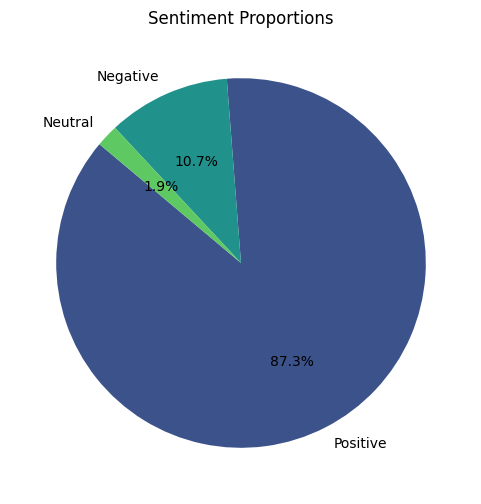

In [61]:
sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts.values,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("viridis", len(sentiment_counts)))
plt.title("Sentiment Proportions")
plt.show()


# Convert text to numerical format using TF-IDF or CountVectorizer

In [65]:
vectroizer2 = TfidfVectorizer()

input_list = df['Text']
#check the TF-IDF of this doc
response = vectroizer2.fit_transform(input_list)

print(response)

  (0, 23038)	0.36272616279660225
  (0, 84105)	0.25985222090138677
  (0, 126842)	0.33037071645289756
  (0, 31586)	0.25239464788882465
  (0, 196682)	0.2033550180114186
  (0, 137681)	0.19876066254370103
  (0, 171899)	0.240985016343094
  (0, 203800)	0.29025183698766044
  (0, 130075)	0.08519408792307859
  (0, 132089)	0.20310262866853773
  (0, 172072)	0.2070127332454033
  (0, 175242)	0.15502340262197808
  (0, 94910)	0.09046078468745844
  (0, 88260)	0.1354079784552691
  (0, 172323)	0.16008698338698893
  (0, 87002)	0.12533131686801724
  (0, 69811)	0.14746406760281325
  (0, 42241)	0.20547492999883316
  (0, 229506)	0.3311141507945936
  (0, 191563)	0.1707778069120583
  (0, 35713)	0.13734257551914922
  (1, 180895)	0.2840029212349045
  (1, 119001)	0.21772456583985264
  (1, 228283)	0.2056001127113792
  (1, 77272)	0.23710710542317406
  :	:
  (568399, 150852)	0.321592917947041
  (568399, 69888)	0.3497951869825618
  (568399, 168936)	0.2512584009249522
  (568399, 220141)	0.23694178157763396
  (568399, 1

In [70]:
vectroizer2 = TfidfVectorizer(max_features=5000)  # or 10k, depending on RAM
response = vectroizer2.fit_transform(df["Text"].astype(str))

### convert TF-IDF into dataframe

In [72]:

# Get feature (word) names
feature_names = vectroizer2.get_feature_names_out()

# Convert sparse matrix to dense and then DataFrame
tfidf_df = pd.DataFrame(response.toarray(), columns=feature_names)

print(tfidf_df.head())


   0br   10  100  1000   11  110   12  120  125  12a  ...     yummy  zero  \
0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   0.0   
1  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   0.0   
2  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.161921   0.0   
3  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   0.0   
4  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.173967   0.0   

   zevia  zico  zinc  zing  zip  ziploc  ziplock  zukes  
0    0.0   0.0   0.0   0.0  0.0     0.0      0.0    0.0  
1    0.0   0.0   0.0   0.0  0.0     0.0      0.0    0.0  
2    0.0   0.0   0.0   0.0  0.0     0.0      0.0    0.0  
3    0.0   0.0   0.0   0.0  0.0     0.0      0.0    0.0  
4    0.0   0.0   0.0   0.0  0.0     0.0      0.0    0.0  

[5 rows x 5000 columns]


### visualise it

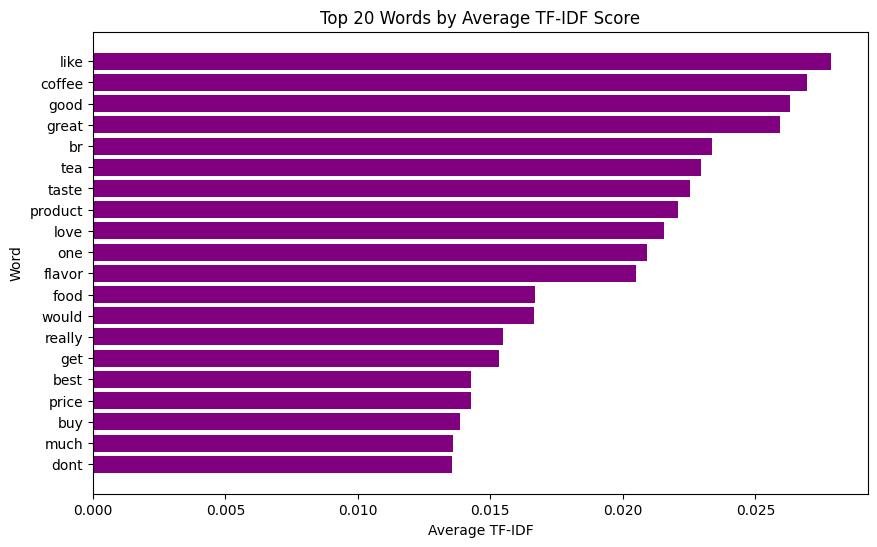

In [75]:


# Compute mean score per word
avg_tfidf = np.asarray(response.mean(axis=0)).ravel()
top_indices = avg_tfidf.argsort()[-20:][::-1]

top_words = [feature_names[i] for i in top_indices]
top_scores = avg_tfidf[top_indices]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(top_words[::-1], top_scores[::-1], color="purple")
plt.title("Top 20 Words by Average TF-IDF Score")
plt.xlabel("Average TF-IDF")
plt.ylabel("Word")
plt.show()


# train a binary classifier (logistic regression) and evaluate its performance

### importing libraries needed

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


### prepare features and labels

In [97]:
# Drop rows where sentiment is NaN
df = df.dropna(subset=["sentiment"])

# Map to binary again
y = df["sentiment"].map({"Positive": 1, "Negative": 0})

# Double-check no NaNs remain
print(y.isna().sum())





11073


In [99]:
print(df["sentiment"].unique())
print(df["sentiment"].isna().sum())


['Positive' 'Negative' 'Neutral']
0


In [101]:
df = df[df["sentiment"].isin(["Positive", "Negative"])]
df = df.dropna(subset=["sentiment"])  # just in case


In [103]:
y = df["sentiment"].map({"Positive": 1, "Negative": 0})
print(y.isna().sum())  # should be 0 now


0


In [105]:
X = df["Text"].astype(str)



### train/test split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### TF-IDF vectorization

In [109]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


### train logistic regression

In [113]:
log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg.fit(X_train_vec, y_train)
y_pred = log_reg.predict(X_test_vec)


### evaluate the model training

In [116]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9673712163350259

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84     12180
           1       0.97      0.99      0.98     99286

    accuracy                           0.97    111466
   macro avg       0.95      0.88      0.91    111466
weighted avg       0.97      0.97      0.97    111466



# Confusion Matrix Visualization

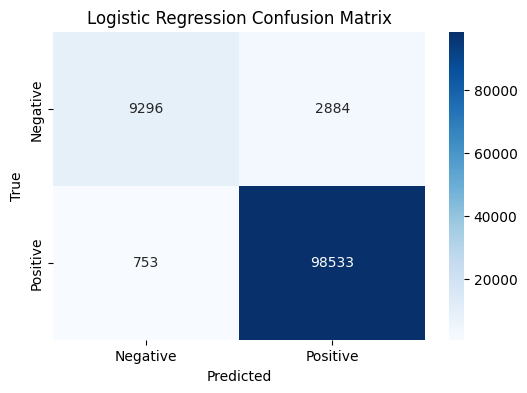

In [119]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Try using a Naive Bayes classifier and compare accuracy

### importing needed libraries

In [123]:
from sklearn.naive_bayes import MultinomialNB

### train/test split and training the model

In [131]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_vec = vectorizer.fit_transform(X)

#train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42
)

# train naive classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

### results of training

In [138]:
print("Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Results
Accuracy: 0.8954479392819336
              precision    recall  f1-score   support

           0       0.90      0.06      0.12     12364
           1       0.90      1.00      0.94     99102

    accuracy                           0.90    111466
   macro avg       0.90      0.53      0.53    111466
weighted avg       0.90      0.90      0.85    111466



# confusion matrix result of naive classifier

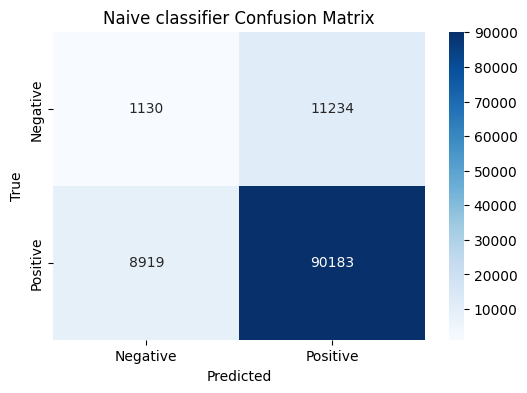

In [135]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Naive classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()